## Imports

In [2]:
import os
from config import *
def getAverage(array):
    sum = 0
    for x in array:
        sum += float(x)
    avg = sum / len(array)
    return round(avg,2)
def getMax(array):
    max = 0
    for x in array:
        if float(x) > max:
            max = float(x)
    return max

def getMin(array):
    min = float(array[0])
    for x in array:
        if float(x) < min:
            min = float(x)
    return min

def getImpactPercent(val, ref):
    return 100*((float(val)/float(ref)) -1)

## Training Data Results

In [ ]:

##NOTE: Dirs must follow training_*/base_*/run_*

BASEDIR= RESULTS_FOLDER + "new_training/"
outfile = open("results_training.log", "w") # change to a
for c in range(6):
    outfile.write("b_Dvfs_C"+str(c)+"\t")
for c in range(6):
    outfile.write("b_C"+str(c)+"_AppId\t")
for c in range(6):
    outfile.write("b_C"+str(c)+"_Instr\t")
    outfile.write("b_C"+str(c)+"_Access\t")
    outfile.write("b_C"+str(c)+"_Misses\t")
outfile.write("b_Eff\t")
for c in range(6):
    outfile.write("a_Dvfs_C"+str(c)+"\t")
for c in range(6):
    outfile.write("a_C"+str(c)+"_AppId\t")
outfile.write("a_Eff\n")

#iterating over all training file results
for training_dir in sorted(os.listdir(BASEDIR)):
    t = os.path.join(BASEDIR, training_dir)
    stat_file = open(t+"/stats.out")
    data = stat_file.readlines()
    for l in data:
        outfile.write(l)
outfile.close()
print("Training results generated")

## Motivation/Run-time Results

In [4]:
BASEDIR=RESULTS_FOLDER + "500_pre/"
#BASEDIR=RESULTS_FOLDER + "results_motiv/"
outfile = open("results_runtime.log", "w")

runs = 500
num_policies = 4

policyAverages = []
policyMin = []
policyMax = []
policies = []
all_pows = []
lens=[]
policyTimes = []
all_effs = [ [0]*runs for i in range(num_policies)]
iterx = 0
#iterating over all  results folder
for result_dir in sorted(os.listdir(BASEDIR)):
    t = os.path.join(BASEDIR, result_dir)
    if os.path.isdir(t):
        print(t)
        policies.append(result_dir[:result_dir.find("_")])
        avg_of_each_run = []
        pows_each_run = []
        #iterating over each run mapping
        itery = 0
        timefile = open(os.path.join(t, "time.log"), "r")
        policyTimes.append(getAverage(timefile.readlines()))
        for run_dir in sorted(os.listdir(t)):
            run = os.path.join(t, run_dir)
            if itery >= runs:
                break
            if os.path.isdir(run):
                #iterating over result files
                files = sorted(os.listdir(run))
                eff_file = open(os.path.join(run, files[0]), "r")
                pow_file = open(os.path.join(run, files[1]), "r")
                #print(os.path.join(run, files[0]))
                eff_data = eff_file.readlines()
                pow_data = pow_file.readlines()
                avg_run = getAverage(eff_data)
                avg_pow_run = getAverage(pow_data)
                all_effs[iterx] [itery] = avg_run
                avg_of_each_run.append(avg_run)
                pows_each_run.append(avg_pow_run)
                eff_file.close()
                itery+=1

        lens.append(len(avg_of_each_run))
        avg_policy = getAverage(avg_of_each_run)
        all_pows.append(getAverage(pows_each_run))
        policyAverages.append(avg_policy)
        #policyMax.append(getMax(avgs))
        #policyMin.append(getMin(avgs))
        iterx+=1
        
print("policy order: ", policies)
print("Average efficiencies: ", policyAverages)
#print(policyMax)
#print(policyMin)


impact_eff_avg = []
impact_eff_mins = []
impact_eff_maxs = []
for x in range(1,len(policies)):
    impact_eff_avg.append(getImpactPercent(policyAverages[x],
                                       policyAverages[0]))
    #impact_eff_mins.append(getImpactPercent(policyMin[x],
    #                                   policyMin[0]))
    #impact_eff_maxs.append(getImpactPercent(policyMax[x],
    #                                   policyMax[0]))


#print(impact_eff_avg)
outfile.close()
policyEnergy = []
policyEDP = []
for i in range(len(policies)):
    policyEnergy.append(round(policyTimes[i] * 0.001* all_pows[i],2))
    policyEDP.append(round(policyTimes[i] * policyTimes[i] * 0.001 * all_pows[i],2))

print("Average powers (mW): ", all_pows)
print("Average makespans (s): ",policyTimes)
print("Average energies (J): ", policyEnergy)
print("Average EDP (Js): ", policyEDP)
print("Run-time results generated")

results/500_pre/baseline_2023-11-24_14-28-52
results/500_pre/dvfs_2023-11-16_00-41-18
results/500_pre/fixedcore_2023-11-16_10-25-09
results/500_pre/neuralnetwork_2023-11-16_17-12-00
policy order:  ['baseline', 'dvfs', 'fixedcore', 'neuralnetwork']
Average efficiencies:  [1938613464.46, 2003043856.26, 2015875971.48, 1926310892.14]
Average powers (mW):  [2053.27, 1519.63, 1987.66, 1745.89]
Average makespans (s):  [37.64, 68.5, 47.46, 62.87]
Average energies (J):  [77.29, 104.09, 94.33, 109.76]
Average EDP (Js):  [2909.01, 7130.48, 4477.11, 6900.87]
Run-time results generated


------------>ideal: 1
------------>ideal: 2
------------>ideal: 5
bad sota: 7 loss =  -26.64
fixed is: 7 loss =  9.45
------------>ideal: 8
------------>ideal: 9
------------>ideal: 10
------------>ideal: 11
backup: 12
------------>ideal: 15
------------>ideal: 17
------------>ideal: 18
------------>ideal: 20
backup: 23
backup: 24
------------>ideal: 28
backup: 30
backup: 37
------------>ideal: 40
bad sota: 43 loss =  -19.26
fixed is: 43 loss =  -11.62
bad sota: 44 loss =  -28.88
fixed is: 44 loss =  34.77
------------>ideal: 51
------------>ideal: 56
bad sota: 57 loss =  -27.1
fixed is: 57 loss =  21.4
------------>ideal: 59
------------>ideal: 63
backup: 67
backup: 70
------------>ideal: 71
bad sota: 77 loss =  -15.11
fixed is: 77 loss =  18.65
backup: 82
bad sota: 83 loss =  -18.39
fixed is: 83 loss =  -6.31
------------>ideal: 84
bad sota: 93 loss =  -15.73
fixed is: 93 loss =  1.98
------------>ideal: 94
------------>ideal: 98
bad sota: 102 loss =  -25.37
fixed is: 102 loss =  1.6

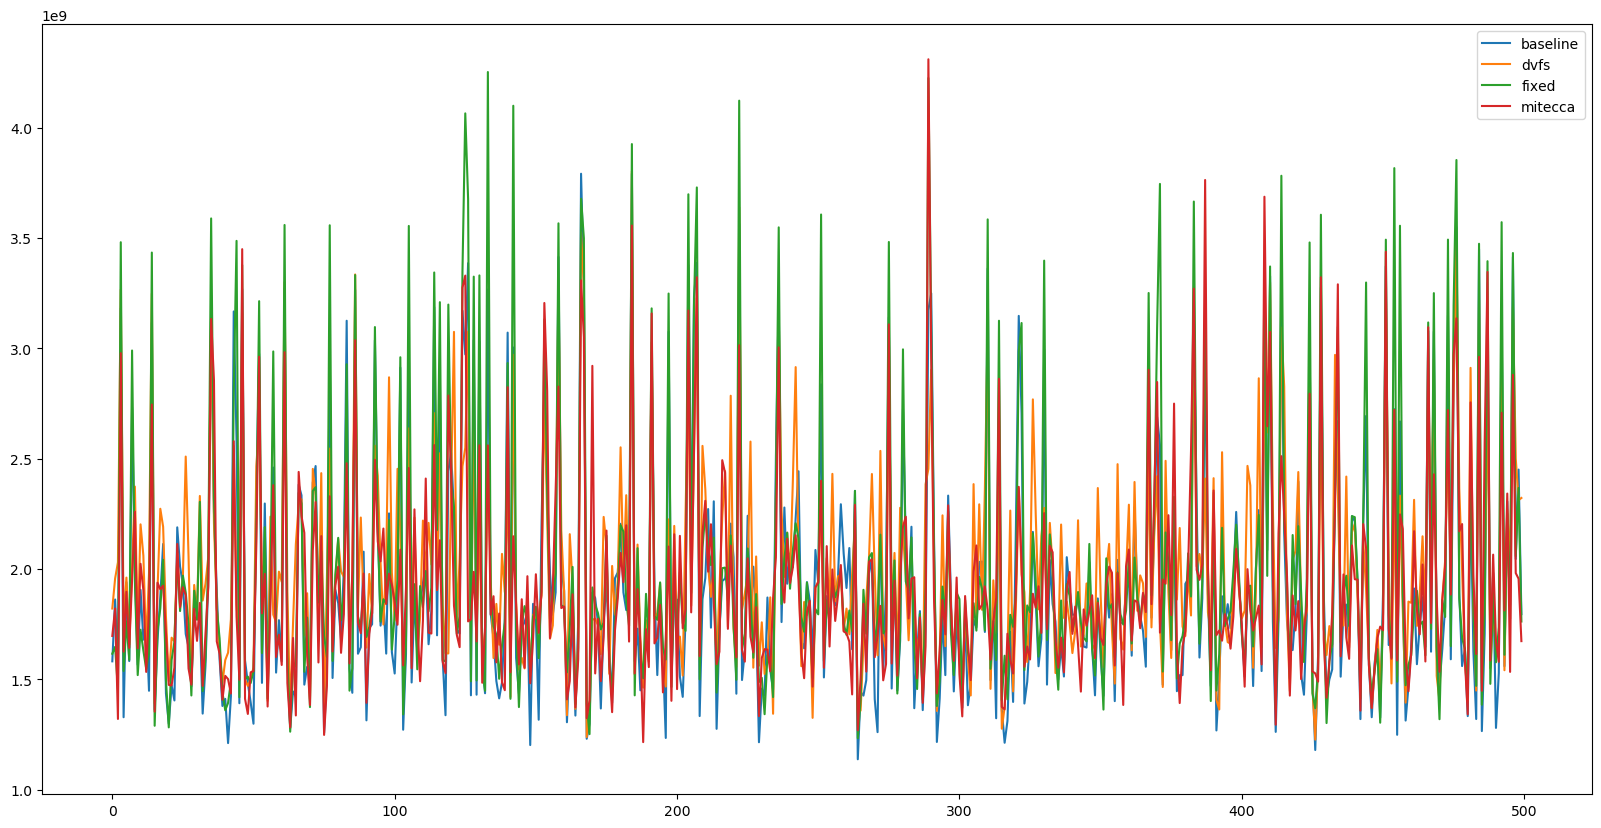

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
min_ours = 100
min_sota = 100

s0 =  pd.Series([float(a) for a in all_effs[0]], name='baseline')
s1 =  pd.Series([float(a) for a in all_effs[1]], name='dvfs')
s2 =  pd.Series([float(a) for a in all_effs[2]], name='fixed')
s3 =  pd.Series([float(a) for a in all_effs[3]], name='mitecca')

s = [s0, s1, s2, s3]

df = pd.concat(s,axis=1)
# p = plt.plot(s0)
# p = plt.plot(s1)
# p = plt.plot(s2)
df.plot(figsize=(20,10))
count_sota = 0
count_ours = 0
sota_better = 0
fixed_better = 0
for idx in range(len(s0)):

    if (s1[idx] > s0[idx]) & (s0[idx] > s2[idx]):
        print("------------>ideal: " + str(idx))
        #print("loss fixed = ", round(getImpactPercent(s1[idx], s0[idx]),2),"%", " loss sota = ", round(getImpactPercent(s2[idx], s0[idx]),2),"%")
    elif (s1[idx] > s2[idx]) & (s0[idx] > s2[idx]):
        print("backup: " + str(idx))
        loss = round(getImpactPercent(s1[idx], s0[idx]),2)
        #print("loss fixed = ",loss,"%", " loss sota = ",  round(getImpactPercent(s2[idx], s0[idx]),2),"%")
    if (s1[idx] > s0[idx]):
        sota_better+=1
    if (s2[idx] > s1[idx]):
        fixed_better+=1
    loss = round(getImpactPercent(s1[idx], s0[idx]),2)
    loss_fixed = round(getImpactPercent(s2[idx], s0[idx]),2)
    loss_ours = round(getImpactPercent(s3[idx], s0[idx]),2)
    if loss < min_sota:
        min_sota = loss
    if loss_ours < min_ours:
        min_ours = loss_ours
    if (loss < -15):
        count_sota +=1
        print("bad sota: " + str(idx), "loss = ", loss, )
        print("fixed is: " + str(idx), "loss = ", loss_fixed )
    if (loss > 0 ) & (loss_fixed > loss):
        count_sota +=1
        #print("sota +: " + str(idx), "loss = ", loss, )
        #print("fixed better: " + str(idx), "loss = ", loss_fixed )
    if (loss_ours < -10):
        count_ours +=1
        #print("bad sota: " + str(idx), "loss = ", loss, )
        #print("fixed is: " + str(idx), "loss = ", loss_fixed )
        #print("ours is: " + str(idx), "loss = ", loss_fixed )
#print("worst sota ", min_sota, "wost ours ", min_ours)
#print("sota below -10% ", count_sota, "ours below 10% ", count_ours)


print(lens[1])

In [25]:
mapping = [['spec-h264ref', 'spec-namd', 'spec-gcc', 'spec-bwaves', 'spec-zeusmp', './tcc'], ['splash-radix', 'splash-cholesky', 'spec-namd', 'spec-milc', 'splash-barnes', './tcc'], ['./tcc', 'splash-lu', 'spec-bzip2', 'spec-h264ref', 'spec-zeusmp', 'spec-mcf'], ['spec-sphinx3', 'splash-ocean', './tcc', 'splash-barnes', 'spec-h264ref', 'splash-fmm'], ['spec-h264ref', 'splash-raytrace', 'spec-bzip2', './tcc', 'splash-barnes', 'splash-radix'], ['spec-h264ref', './tcc', 'spec-mcf', 'spec-sphinx3', 'spec-astar', 'spec-namd'], ['spec-gobmk', 'spec-zeusmp', 'spec-namd', './tcc', 'spec-lbm', 'spec-sphinx3'], ['spec-gobmk', 'splash-cholesky', 'spec-milc', 'spec-h264ref', 'spec-gcc', './tcc'], ['splash-lu', 'spec-lbm', 'spec-bwaves', './tcc', 'spec-zeusmp', 'splash-fmm'], ['spec-bwaves', './tcc', 'spec-gcc', 'splash-cholesky', 'splash-raytrace', 'spec-sphinx3'], ['spec-sphinx3', './tcc', 'splash-lu', 'spec-namd', 'splash-barnes', 'spec-lbm'], ['spec-gcc', 'splash-barnes', 'spec-bzip2', 'spec-namd', 'spec-astar', './tcc'], ['./tcc', 'spec-namd', 'spec-milc', 'spec-bwaves', 'spec-gcc', 'spec-sphinx3'], ['./tcc', 'spec-astar', 'spec-zeusmp', 'spec-bzip2', 'splash-lu', 'spec-mcf'], ['spec-gobmk', 'spec-lbm', './tcc', 'splash-radix', 'splash-ocean', 'spec-bwaves'], ['spec-sphinx3', 'splash-lu', 'spec-milc', 'spec-astar', 'splash-fmm', './tcc'], ['spec-gobmk', 'spec-zeusmp', 'spec-lbm', './tcc', 'spec-bzip2', 'spec-gcc'], ['spec-sphinx3', './tcc', 'splash-barnes', 'spec-astar', 'splash-lu', 'spec-gobmk'], ['./tcc', 'spec-sphinx3', 'splash-lu', 'spec-gobmk', 'splash-raytrace', 'spec-milc'], ['splash-barnes', 'spec-zeusmp', 'spec-sphinx3', 'splash-fmm', './tcc', 'spec-astar'], ['./tcc', 'splash-fmm', 'spec-gcc', 'splash-cholesky', 'splash-barnes', 'spec-bzip2'], ['spec-h264ref', 'spec-bzip2', './tcc', 'spec-zeusmp', 'spec-namd', 'spec-gobmk'], ['spec-bzip2', './tcc', 'splash-raytrace', 'spec-lbm', 'spec-sphinx3', 'spec-milc'], ['spec-namd', 'spec-bwaves', 'splash-lu', 'spec-gcc', './tcc', 'spec-sphinx3'], ['spec-h264ref', './tcc', 'spec-gobmk', 'spec-milc', 'splash-cholesky', 'spec-namd'], ['splash-radix', 'spec-gobmk', 'spec-astar', 'splash-fmm', './tcc', 'splash-lu'], ['spec-bwaves', 'spec-gobmk', 'spec-sphinx3', 'splash-raytrace', './tcc', 'spec-gcc'], ['spec-gcc', './tcc', 'spec-bzip2', 'spec-astar', 'splash-cholesky', 'splash-radix'], ['spec-lbm', './tcc', 'splash-lu', 'spec-mcf', 'splash-cholesky', 'spec-namd'], ['splash-barnes', './tcc', 'spec-bzip2', 'spec-gobmk', 'splash-cholesky', 'spec-namd'], ['splash-ocean', './tcc', 'spec-sphinx3', 'spec-gobmk', 'spec-namd', 'spec-zeusmp'], ['spec-namd', 'spec-milc', 'splash-barnes', 'splash-cholesky', 'spec-lbm', './tcc'], ['spec-gcc', './tcc', 'spec-namd', 'splash-barnes', 'spec-lbm', 'splash-raytrace'], ['./tcc', 'spec-h264ref', 'spec-gobmk', 'spec-astar', 'spec-zeusmp', 'splash-fmm'], ['./tcc', 'spec-sphinx3', 'spec-zeusmp', 'splash-raytrace', 'splash-ocean', 'splash-fmm'], ['splash-cholesky', 'splash-lu', 'splash-fmm', './tcc', 'spec-bzip2', 'splash-raytrace'], ['spec-sphinx3', 'spec-milc', 'spec-zeusmp', './tcc', 'spec-mcf', 'spec-lbm'], ['splash-cholesky', 'spec-bzip2', 'spec-h264ref', 'spec-astar', './tcc', 'spec-gcc'], ['splash-raytrace', 'spec-lbm', 'spec-gcc', './tcc', 'spec-gobmk', 'spec-astar'], ['spec-bwaves', 'splash-barnes', 'splash-radix', './tcc', 'spec-mcf', 'spec-namd'], ['spec-h264ref', 'splash-raytrace', 'splash-ocean', './tcc', 'spec-bwaves', 'splash-fmm'], ['./tcc', 'splash-ocean', 'splash-barnes', 'spec-namd', 'spec-milc', 'spec-lbm'], ['spec-milc', 'spec-zeusmp', 'spec-gcc', 'spec-namd', 'splash-barnes', './tcc'], ['./tcc', 'spec-sphinx3', 'splash-fmm', 'spec-h264ref', 'spec-mcf', 'spec-astar'], ['./tcc', 'spec-zeusmp', 'splash-ocean', 'splash-cholesky', 'spec-bwaves', 'spec-namd'], ['splash-lu', 'splash-barnes', 'spec-namd', 'spec-h264ref', './tcc', 'spec-sphinx3'], ['spec-namd', 'splash-raytrace', 'spec-h264ref', './tcc', 'spec-lbm', 'spec-bwaves'], ['./tcc', 'spec-bzip2', 'spec-h264ref', 'spec-namd', 'spec-gobmk', 'splash-lu'], ['spec-bwaves', 'spec-zeusmp', 'splash-radix', 'spec-gcc', './tcc', 'splash-ocean'], ['spec-namd', 'splash-raytrace', 'spec-lbm', './tcc', 'splash-barnes', 'spec-zeusmp']]
print(mapping[25])
print(all_effs[2][25], all_effs[0][25])


['splash-radix', 'spec-gobmk', 'spec-astar', 'splash-fmm', './tcc', 'splash-lu']
1335017329.6695662 1391166162.5436006


In [ ]:
# new 10
## 0 is ['spec-astar', 'splash-barnes', 'spec-milc', 'splash-radix', 'spec-zeusmp', './tcc']
## 1 is ['splash-barnes', 'spec-mcf', 'splash-ocean', 'splash-radix', 'spec-gcc', './tcc']
## 2 is ['spec-astar', 'spec-milc', 'splash-raytrace', './tcc', 'spec-h264ref', 'splash-cholesky']
## 3 is ['splash-raytrace', './tcc', 'splash-ocean', 'splash-radix', 'spec-mcf', 'spec-gobmk']
## 4 is ['splash-raytrace', './tcc', 'spec-milc', 'splash-ocean', 'spec-gobmk', 'spec-gcc']
## 5 is ['spec-milc', 'spec-bzip2', './tcc', 'spec-gobmk', 'spec-lbm', 'splash-ocean']
## 6 is ['./tcc', 'spec-astar', 'spec-bwaves', 'spec-lbm', 'splash-cholesky', 'splash-radix']
## 7 is ['spec-lbm', 'spec-namd', 'spec-bwaves', './tcc', 'spec-mcf', 'splash-cholesky']
## 8 is ['spec-bzip2', 'splash-fmm', 'splash-radix', 'spec-milc', 'splash-ocean', './tcc']
## 9 is ['./tcc', 'spec-zeusmp', 'spec-lbm', 'spec-bzip2', 'splash-raytrace', 'splash-cholesky']


In [ ]:
#new10_14
#1 is ['./tcc', 'spec-namd', 'spec-bwaves', 'spec-sphinx3', 'spec-bzip2', 'spec-milc']